In [10]:
# Importing modules
import pandas as pd;

# Reading in datasets/book1.csv
book1 = pd.read_csv('D:/GoT - Network Analysis/book1.csv');

#Printing out the head of dataset
print(book1.head());

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [24]:
# Importing modules
import networkx as nx

#Creating an empty graph object
G_book1 = nx.Graph();

In [25]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight']);

# Creating a list of networks for all the books
books = [G_book1];
book_fnames = ['D:/GoT - Network Analysis/book2.csv', 'D:/GoT - Network Analysis/book3.csv',
               'D:/GoT - Network Analysis/book4.csv', 'D:/GoT - Network Analysis/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname);
    G_book = nx.Graph();
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight']);
    books.append(G_book);

In [15]:
# Calculating the degree centrality of book 1
deg_cen_book1 = nx.degree_centrality(books[0]);

# Calculating the degree centrality of book 5
deg_cen_book5 = nx.degree_centrality(books[4]);

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 =  sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10];

# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book5 =  sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10];

# Printing out the top 10 of book1 and book5
print(sorted_deg_cen_book1);
print(sorted_deg_cen_book5);

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)]
[('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


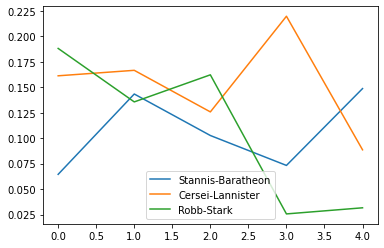

In [16]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books];
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol);

# Plotting the degree centrality evolution of Stannis-Baratheon, Cersei-Lannister, Robb-Stark
degree_evol_df[['Stannis-Baratheon', 'Cersei-Lannister', 'Robb-Stark']].plot();

<AxesSubplot:>

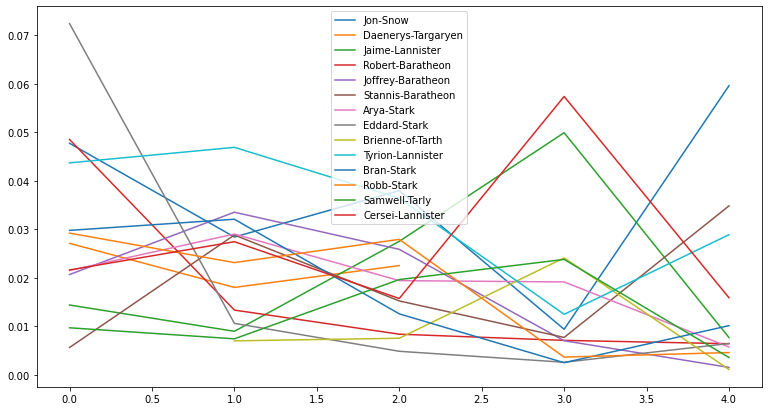

In [31]:
# Creating a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book) for book in books]

# Making a DataFrame from the list
pagerank_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

# Plotting the top characters
pagerank_evol_df[list_of_char].plot(figsize=(13, 7))

In [29]:
# Creating a list of pagerank, betweenness centrality, degree centrality
# of all the characters in the fifth book.
measures = [nx.pagerank(books[4]), 
            nx.degree_centrality(books[4])]

# Creating the correlation DataFrame
cor = pd.DataFrame.from_records(measures)

# Calculating the correlation
cor.T.corr()

,0,1
0,1.000000,0.971493
1,0.971493,1.000000


In [30]:
# Finding the most important character in the fifth book,  
# according to degree centrality, betweenness centrality and pagerank.
p_rank, b_cent = cor.idxmax(axis=1)

# Printing out the top character accoding to the three measures
print(p_rank)

Jon-Snow
